# Translation of EE179 lab 7

Original (Matlab): https://web.stanford.edu/class/ee179/labs/Lab7.html


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample
from math import pi
from itertools import takewhile
from pathlib import Path

In [2]:
base_path = Path(globals()['_dh'][0]).parent

file_path = (base_path / "assets/aprs23.dat").resolve()

In [5]:
def load_file(path):
    file = np.fromfile(path, dtype='uint8')
    file = file.astype('int32')
    file = file - 127
    file = file[::2] + 1j * file[1::2]
    return file

In [6]:
file = load_file(file_path)

In [7]:
decimated = decimate(decimate(file, 8, ftype='fir'), 8, ftype='fir')
decimated[0] = 0

/home/thomas/.cache/pypoetry/virtualenvs/python-ax25-experiment-Q3RopBbh-py3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


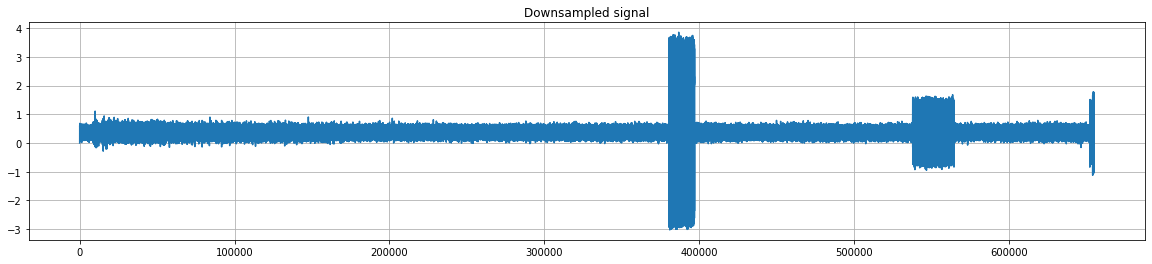

In [8]:
fig, ax = plt.subplots()
ax.plot(decimated)
fig.set_figwidth(20)
ax.set(title='Downsampled signal')
ax.grid()
plt.show()

In [9]:
first_packet = decimated[380000:396384]
first_packet = first_packet - (sum(first_packet)/len(first_packet)) # subtract DC bias
first_packet = resample(first_packet, int(0.75*len(first_packet)))

/home/thomas/.cache/pypoetry/virtualenvs/python-ax25-experiment-Q3RopBbh-py3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


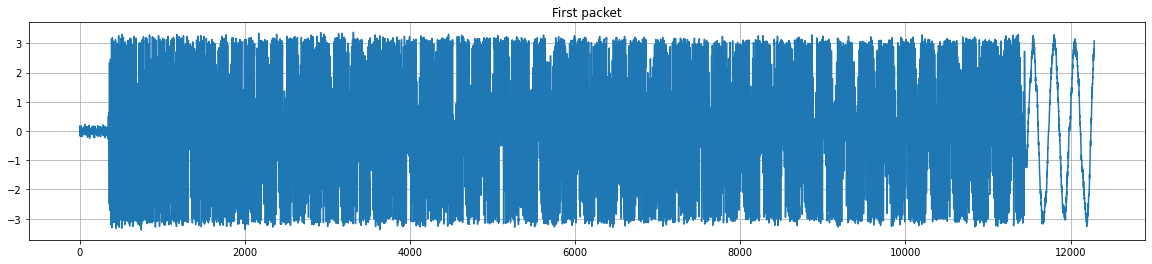

In [10]:
fig, ax = plt.subplots()
ax.plot(first_packet)
fig.set_figwidth(20)
ax.set(title='First packet')
ax.grid()
plt.show()

In [11]:
dpf = np.angle(np.conj(first_packet[:-1]) * first_packet[1:])

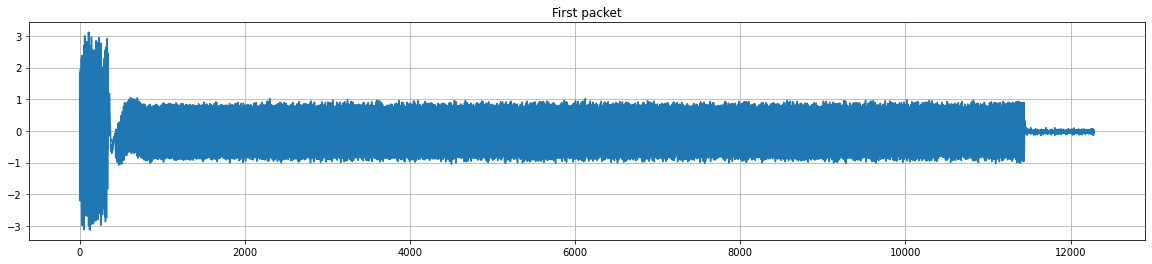

In [12]:
fig, ax = plt.subplots()
ax.plot(dpf)
fig.set_figwidth(20)
ax.set(title='First packet')
ax.grid()
plt.show()

In [13]:
t20 = np.array([ x/20 for x in range(-10,10) ]).astype(np.longdouble)

mf1200 = np.exp(1j*2*pi*t20*1.0)
mf2200 = np.exp(1j*2*pi*t20*1.8)

d12 = np.convolve(dpf, mf1200,'same')
d22 = np.convolve(dpf, mf2200,'same')

ddif = abs(d12)-abs(d22)

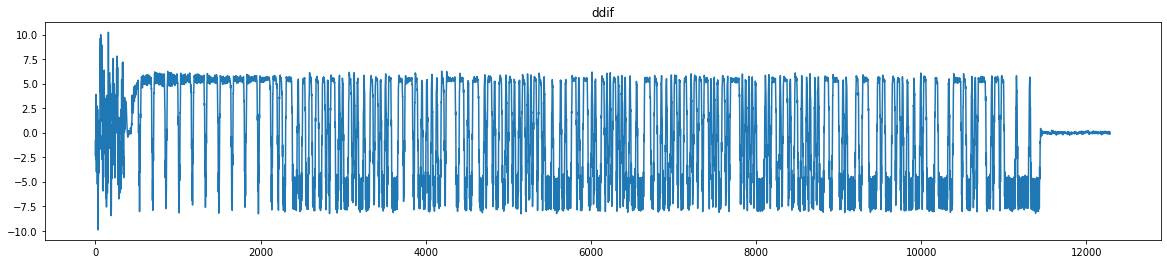

In [14]:
fig, ax = plt.subplots()
ax.plot(ddif)
fig.set_figwidth(20)
ax.set(title='ddif')
plt.show()

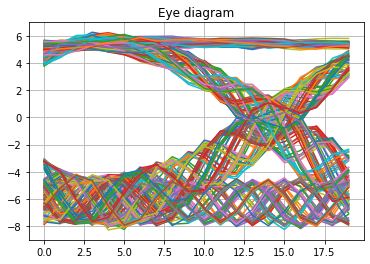

In [15]:
n1 = 2000
n2 = n1 + 20*256

# Choose n2 to be an integer number of samples into the packet (here 256). We can then make an eye diagram with

boff = [ x for x in range(-10, 10) ]
eyed = np.reshape(ddif[n1-10:n2-10], (20,256), 'F')

fig, ax = plt.subplots()
ax.plot(eyed)
ax.set(title='Eye diagram')
ax.grid()
plt.show()

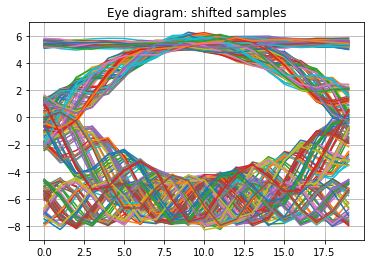

In [16]:
eyedm6 = np.reshape(ddif[n1-10-6:n2-10-6],(20,256), 'F')

fig, ax = plt.subplots()
ax.plot(eyedm6)
ax.set(title='Eye diagram: shifted samples')
ax.grid()
plt.show()

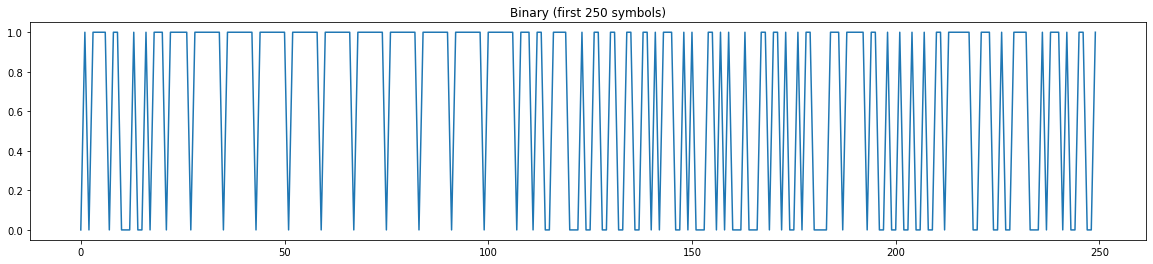

In [17]:
bts = ddif[0::20] > 0
# bts = ddif[1::20] > 0

fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(bts[0:250])
ax.set(title='Binary (first 250 symbols)')
plt.show()

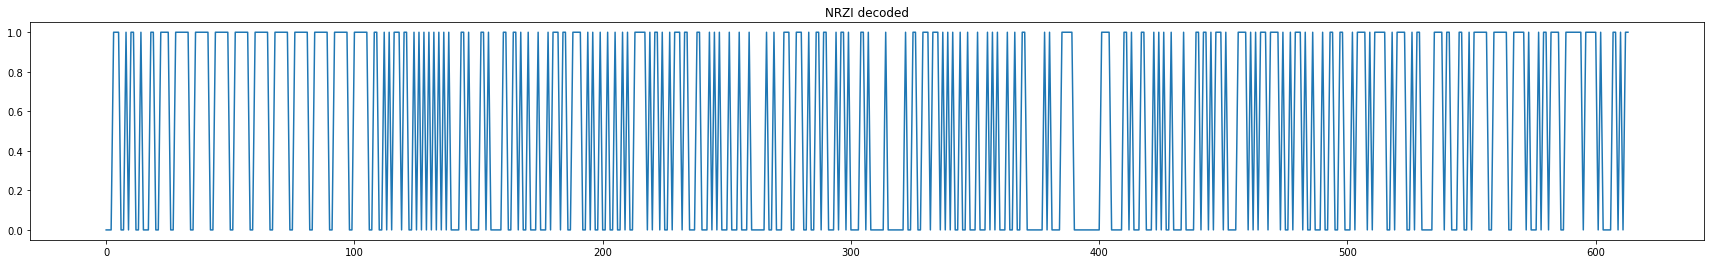

In [18]:
db = [ x == y for x, y in zip(bts, bts[1:])]

fig, ax = plt.subplots()
fig.set_figwidth(30)
ax.plot(db)
ax.set(title='NRZI decoded')
plt.show() 

Frames start at [27, 35, 43, 51, 59, 67, 75, 83, 91, 99, 550, 558]
Frames end at   [35, 43, 51, 59, 67, 75, 83, 91, 99, 107, 558, 566]


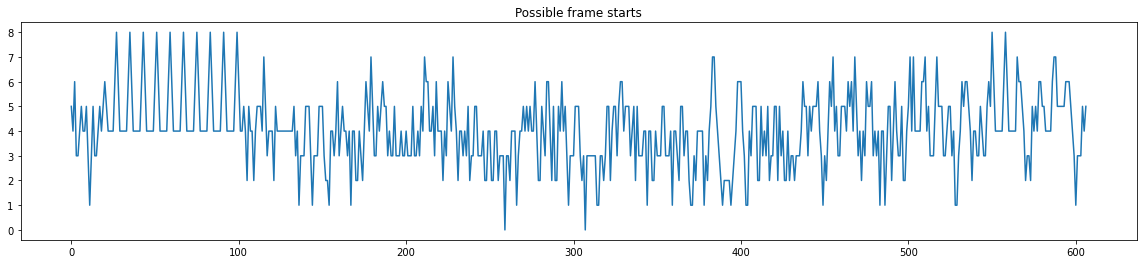

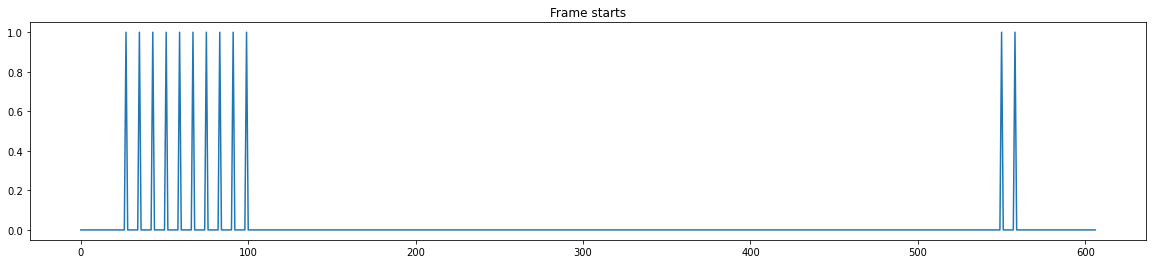

In [19]:
frame_starts = [ sum([not(s0), s1, s2, s3, s4, s5, s6, not(s7)]) for s0,s1,s2,s3,s4,s5,s6,s7 in zip(db, db[1:], db[2:], db[3:], db[4:], db[5:], db[6:], db[7:])]

frame_start_indices = [ idx for idx, x in enumerate(frame_starts) if x == 8 ]

print(f'Frames start at {frame_start_indices}')

print(f'Frames end at   {list(map(lambda x: x + 8, frame_start_indices))}')

fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(frame_starts)
ax.set(title='Possible frame starts')
fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(list(map(lambda x: x == 8, frame_starts)))
ax.set(title='Frame starts')
plt.show() 

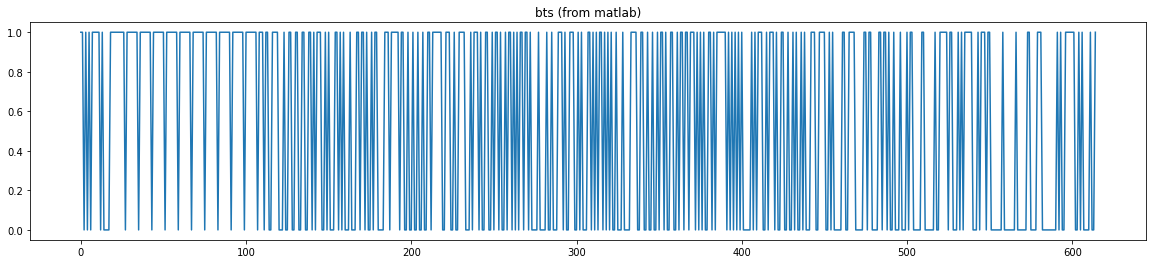

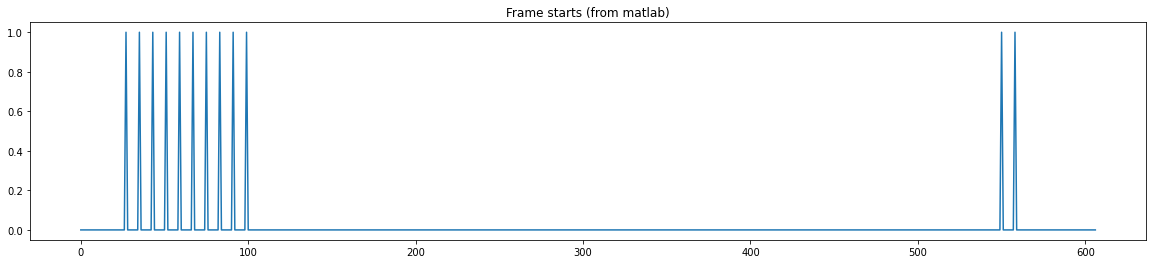

In [20]:
# Verifying that we get the same output as in Matlab

from_matlab = np.array([True, True, False, True, False, True, False, True, True, True, True, True, False, True, False, False, False, False, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, False, True, True, True, False, True, True, False, False, True, True, True, True, False, False, False, True, False, False, True, True, False, False, True, True, False, False, True, True, False, False, True, True, False, True, False, True, True, True, False, False, True, False, True, False, False, False, True, True, False, True, False, True, False, False, False, True, False, False, False, True, True, False, True, True, False, True, False, False, True, False, True, True, False, False, False, False, True, True, True, False, True, True, True, True, True, False, True, True, False, False, True, False, False, True, False, False, True, False, False, True, False, False, True, True, False, True, True, True, True, True, True, False, False, True, True, True, False, False, True, False, False, True, True, True, True, False, False, False, True, False, True, True, True, False, True, False, False, True, True, False, False, True, False, True, True, False, True, False, False, True, False, True, True, False, True, False, True, False, True, True, False, True, True, False, True, False, False, False, False, True, False, False, False, False, True, False, False, True, False, False, False, True, True, True, False, True, False, False, True, True, True, False, False, True, False, True, False, False, False, True, True, False, True, False, True, False, True, True, False, True, False, True, False, True, False, False, True, False, False, False, True, False, False, False, False, True, True, True, True, False, False, True, True, False, False, True, False, False, True, False, False, True, False, True, True, False, True, False, False, True, True, False, False, True, False, True, True, False, True, True, False, True, True, True, False, True, False, True, False, True, False, False, True, True, False, True, False, True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, False, False, False, False, False, True, False, True, False, True, True, True, False, False, True, False, True, True, True, False, True, False, False, True, True, False, False, True, False, False, True, False, True, False, False, True, False, True, False, False, False, True, True, True, False, False, True, True, True, True, False, False, True, False, True, False, False, False, False, False, True, True, False, False, True, True, True, True, False, False, False, False, False, True, True, False, True, True, False, False, False, False, True, True, False, True, True, False, True, False, False, True, False, False, False, True, False, False, False, True, False, True, True, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, True, True, True, True, True, False, True, True, False, False, False, True, False, True, False, True, True, True, True, True, False, False, False, True, False, True, True, True, False, True, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, True, True, True, False, False, False, False, False, False, False, False, False, True, False, True, False, False, True, True, True, True, True, True, False, False, True, False, True, False, False, False, False, True, False, False, True])

fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(from_matlab)
ax.set(title='bts (from matlab)')
plt.show() 

db_from_matlab = [ x == y for x, y in zip(bts, bts[1:])]

frame_starts_from_matlab = [ not(s0) and s1 and s2 and s3 and s4 and s5 and s6 and not(s7) for s0,s1,s2,s3,s4,s5,s6,s7 in zip(db_from_matlab, db_from_matlab[1:], db_from_matlab[2:], db_from_matlab[3:], db_from_matlab[4:], db_from_matlab[5:], db_from_matlab[6:], db_from_matlab[7:])]

fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(frame_starts_from_matlab)
ax.set(title='Frame starts (from matlab)')
plt.show() 

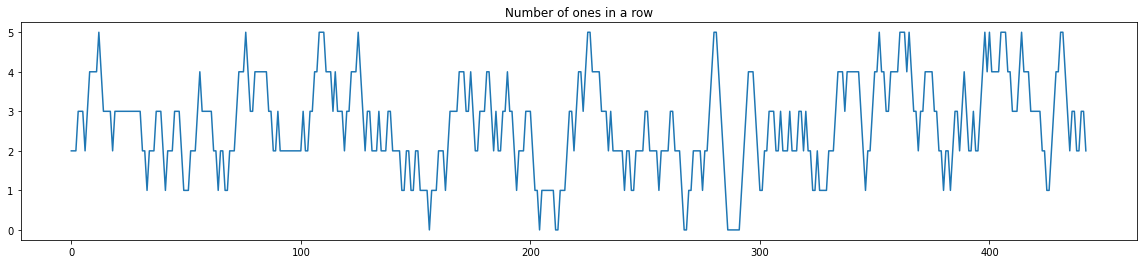

In [21]:
packet_start = 107
packet_end = 550

packet = np.array(db[packet_start:packet_end]).astype(int)

ones_in_a_row = [ sum([s0, s1, s2, s3, s4, s5]) for s0,s1,s2,s3,s4,s5 in zip(packet, packet[1:], packet[2:], packet[3:], packet[4:], packet[5:])]

ones_in_a_row = np.convolve(np.array(packet).astype(int), [1,1,1,1,1,1], 'same')

fig, ax = plt.subplots()
fig.set_figwidth(20)
ax.plot(ones_in_a_row)
ax.set(title='Number of ones in a row')
plt.show() 

In [22]:
destuffed_bits = []

for i, bit in enumerate(packet):
    if ones_in_a_row[i - 1] != 5 or bit != 0:
        destuffed_bits.append(bit)
    else:
        print(f'Skipped bit at position {i}. Bit is {bit} - should be 0')
        
destuffed_bits = np.array(destuffed_bits)

print(f' > Packet had length {len(packet)}, after destuffing length {len(destuffed_bits)}')

Skipped bit at position 111. Bit is 0 - should be 0
Skipped bit at position 353. Bit is 0 - should be 0
Skipped bit at position 366. Bit is 0 - should be 0
Skipped bit at position 401. Bit is 0 - should be 0
Skipped bit at position 432. Bit is 0 - should be 0
 > Packet had length 443, after destuffing length 438


In [23]:
def bits_to_char(b):
    if len(b) < 8:
        return '?'

    bv = b[0]*1 + b[1]*2 + b[2]*4 + b[3]*8 + b[4]*16 + b[5]*32 + b[6]*64 + b[7]*128
    return chr(bv)

def char_to_bits(c):
    return [ int(x) for x in f'{ord(c):b}'.zfill(8)[::-1] ]


def chunk(l, n):
    n = max(1, n)
    return list(l[i:i+n] for i in range(0, len(l), n))

def bit_stuff(arr):
    arr = list(arr)
    i = 0
    while i < len(arr):
        if i >= 4 and arr[i-4] == 1 and arr[i-3] == 1 and arr[i-2] == 1 and arr[i-1] == 1 and arr[i] == 1:
            # We have 5 ones in a row => time to stuff
            arr.insert(i+1, 0)

        i = i + 1

    return np.array(arr)

def bit_destuff(arr):
    arr = list(arr)
    i = 0
    while i < len(arr):
        if i >= 4 and arr[i-5] == 1 and arr[i-4] == 1 and arr[i-3] == 1 and arr[i-2] == 1 and arr[i-1] == 1:
            if (arr[i] != 0):
                print(f'Warning: I had 5 ones in a row during bit de-stuffing, and expected a 0 but got {arr[i]} at index {i}')
            
            # We have 5 ones in a row => time to remove stuffed zero
            print(f'Bit de-stuff: removing {arr[i]} at position {i}')
            arr.pop(i)
            i = i + 1

        i = i + 1

    return np.array(arr)

def nrzi_decode(arr):
    return [ 1 if x == y else 0 for x, y in zip([0] + arr, arr[1:] + [0])]

def parse_address(b):
    def shift_byte(byte):
        return list(byte)[1:] + [0]

    # Format: 0SSIDRRC
    # https://www.tapr.org/pdf/AX25.2.2.pdf page 12
    last_address_byte = b[6]

    return {
        "callsign": ''.join(map(lambda byte: bits_to_char(shift_byte(byte)), b[0:6])),
        "ssid": last_address_byte[1] + last_address_byte[2] * 2 + last_address_byte[3] * 4 + last_address_byte[4] * 8,
        "reserved_bits": last_address_byte[5:7],
        "command_response": True if last_address_byte[7] else False
    }


In [24]:
def parse_packet(pack):
    # Digipeater addresses are 7 characters long
    # A '1' in the left-most position of the byte (LBS) signifies the digipeater list is over
    number_of_digipeaters_addresses = len(list((takewhile(lambda offset: chunk(packet, 8)[14::7][offset][0] == 0, range(0,9)))))
    
    return {
        "destination": parse_address(pack[0:7]),
        "source": parse_address(pack[7:14]),
        "digipeaters": list(map(lambda digipeater_offset: parse_address(pack[14+digipeater_offset*7:14+digipeater_offset*7+7]), range(0, number_of_digipeaters_addresses))),
        "control_field": pack[14+number_of_digipeaters_addresses*7],
        "protocol_id": pack[15+number_of_digipeaters_addresses*7],
        "information": ''.join(list(map(lambda b: bits_to_char(b), pack[16+number_of_digipeaters_addresses*7:]))[:-2]),
        "frame_check_sequence": pack[-2:]
    }

parse_packet(chunk(destuffed_bits, 8))


{'destination': {'callsign': 'S7UUXX',
  'ssid': 0,
  'reserved_bits': array([1, 1]),
  'command_response': False},
 'source': {'callsign': 'KD7OIR',
  'ssid': 14,
  'reserved_bits': array([1, 1]),
  'command_response': True},
 'digipeaters': [],
 'control_field': array([0, 1, 1, 0, 1, 0, 0, 1]),
 'protocol_id': array([0, 1, 1, 1, 0, 1, 1, 0]),
 'information': '\x8c\x8a\x88@â\x9cl´°@@æ®\x92\x88\x8ad@á\x03àÁbTBØºðu\x9f.\x91\x19}\x9f\x9e\x06',
 'frame_check_sequence': [array([1, 1, 1, 1, 1, 1, 0, 0]),
  array([0, 1, 1, 0, 0, 1])]}